In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#MELISSA'S PATH
path = "/content/drive/MyDrive/DSCI532/project/"


In [ ]:
#Importing starting packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Loading Clean Dataset
with open(path + "clean_wapo_data.csv", encoding="latin1", errors='ignore') as f:
  data = pd.read_csv(f)

In [ ]:
#Save df as new variable
clean_data = data
#View Data
clean_data.head()

,Unnamed: 0,date,year,month_year,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,0,2015-01-02,2015,01-2015,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,1,2015-01-02,2015,01-2015,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2,2015-01-03,2015,01-2015,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,3,2015-01-04,2015,01-2015,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,4,2015-01-04,2015,01-2015,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


In [ ]:
###NOTE: If Unnamed columns pop up, drop them by running the code below based on how many you have popping up:
#Dropping Unnamed + Extra Columns
clean_data = clean_data.drop(labels = ['Unnamed: 0'], axis = 1)
#View Data
clean_data.head()

,date,year,month_year,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,2015,01-2015,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,2015,01-2015,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,2015,01-2015,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,2015,01-2015,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,2015,01-2015,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


In [ ]:
#Double checking there are no nans
#Counting NAs
nans = clean_data.isna().sum()
#print ("detailed nans per column:\n", nans)
total_count_nans = clean_data.isna().sum().sum()
#print (total_count_nans)
print ("total nans:", total_count_nans)

total nans: 0


#STATS FOR THE OVERALL DATA SET



In [ ]:
#How many data entries are there from 2015-2022 in clean_data dataset?
count = len(clean_data)
print ("There are", count, "recorded deaths in cleaned dataset")

There are 8088 recorded deaths in cleaned dataset


In [ ]:
#Counting how many deaths there have been for each state
#Counting how much many deaths their were per year
deaths_per_state= clean_data['state'].value_counts()
# print(deaths_per_state)
# print (type(deaths_per_state))

# move index values to a column
deaths_per_state = deaths_per_state.reset_index(drop=False)
#print(deaths_per_state)

#renaming columns of df
state_deaths_df = deaths_per_state.rename(columns={'index' : 'state', 'state' :"count"})
print(state_deaths_df)

   state  count
0     CA   1155
1     TX    738
2     FL    510
3     AZ    365
4     GA    306
5     CO    296
6     OH    232
7     NC    229
8     OK    225
9     WA    223
10    TN    220
11    MO    210
12    NM    172
13    PA    166
14    IL    164
15    LA    160
16    AL    150
17    IN    149
18    NY    148
19    VA    145
20    KY    144
21    MI    136
22    NV    135
23    OR    132
24    SC    129
25    WI    124
26    AR    113
27    MD    111
28    MS    106
29    UT     95
30    NJ     91
31    MN     88
32    KS     77
33    WV     77
34    ID     65
35    MA     54
36    AK     54
37    MT     51
38    IA     50
39    NE     40
40    HI     39
41    ME     34
42    SD     28
43    WY     28
44    DC     24
45    CT     23
46    NH     22
47    ND     18
48    DE     18
49    VT     13
50    RI      6


In [ ]:
#Note: Install plotly-express and kaleido if not already installed to run the code below
# !pip install plotly-express
#!pip install kaleido
import plotly_express as px
import kaleido
import os

In [ ]:
#Plotting death count per state on a chloreopleth map
#RESOURCE: https://towardsdatascience.com/simplest-way-of-creating-a-choropleth-map-by-u-s-states-in-python-f359ada7735e

fig = px.choropleth(state_deaths_df, #name of your dataframe
                    locations='state', #name of the column that represents the U.S. states in your dataframe
                    locationmode="USA-states", #To use Plotly_Express’ built-in USA States geometry, you need to set locationmode='USA-states'
                    scope="usa", #This should be specified as ‘usa’.
                    color='count', #name of the column that represents the metric you want to visualize by state
                    color_continuous_scale="amp", #You can add ‘_r’ to a named color scale to reverses it.
                    )
#fig.show()

#Adding Title
fig.update_layout(
      title_text = 'WaPo 2015-2022 Death Count by State',
      title_font_family="Arial",
      title_font_size = 22,
      title_font_color="black",
      title_x=0.45,
         )

####Note: Should plot the median death count by state

In [ ]:
###Save the figure above - using kaleido package do produce static image
fig.write_image("2015-2022_Death_Count_by_State.png", engine="kaleido")

#Getting the stats of deaths per year for the whole *dataset*

In [ ]:
#Previewing data again
#clean_data.head()

   year  death_count
4  2015          995
7  2016          958
6  2017          983
5  2018          992
3  2019          997
2  2020         1019
1  2021         1048
0  2022         1096


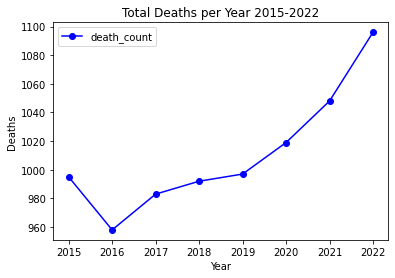

In [ ]:
###Getting the count of deaths for each year
#Make line graph - based on how many deaths per year

#Counting how much many deaths their were per year
deaths_per_year_count = clean_data['year'].value_counts()

#view deaths_per_year_count
# print (deaths_per_year_count)
# print (type(deaths_per_year_count))

# move index values to a column
deaths_per_year_count = deaths_per_year_count.reset_index(drop=False)
# print (type (deaths_per_year_count))
# print ( (deaths_per_year_count))

#renaming columns of df
dpy_df = deaths_per_year_count.rename(columns={'index': 'year', 'year': "death_count"})
#print (dpy_df)

#sorting by descending order
dpy_df_sorted = dpy_df.sort_values(by = 'year', ascending = True)
print (dpy_df_sorted )

#create a line plot of the value counts
dpy_df_sorted.plot(x = 'year', y = 'death_count', kind='line', color='blue', marker='o')

#add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Total Deaths per Year 2015-2022')

#Save plot
plt.savefig('Total Deaths per Year 2015-2022.png')

#display the plot
plt.show()


#Getting the stats of signs of mental illness per year for the whole dataset

In [ ]:
#Getting count of how many deaths were MI (mental illness) related for the whole dataset
mi_overall_count = clean_data['signs_of_mental_illness'].value_counts()
print ("Overall count of how many times mental illness was present:\n", mi_overall_count)

Overall count of how many times mental illness was present:
 False    6395
True     1693
Name: signs_of_mental_illness, dtype: int64


    signs_of_mental_illness  year  count
0                     False  2015    735
1                     False  2016    710
2                     False  2017    745
3                     False  2018    772
4                     False  2019    782
5                     False  2020    800
6                     False  2021    900
7                     False  2022    951
8                      True  2015    260
9                      True  2016    248
10                     True  2017    238
11                     True  2018    220
12                     True  2019    215
13                     True  2020    219
14                     True  2021    148
15                     True  2022    145


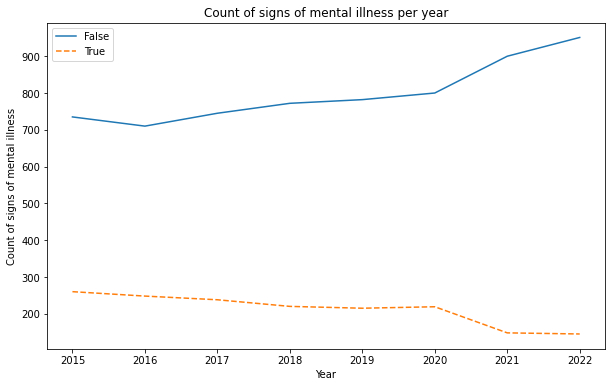

In [ ]:
#Getting count of how many deaths were MI (mental illness) related per year
mi_signs_per_year = clean_data.groupby(['signs_of_mental_illness', 'year']).size()
#print ("Count of signs of MI_per_year:/n", mi_signs_per_year)
#print (type(mi_signs_per_year))

#Movie the boolean count values of MI for each year into a df
mi_per_year_count = mi_signs_per_year.reset_index(drop=False)

#renaming columns of df
mi_df = mi_per_year_count.rename(columns={'index': 'month_year', 'month_year': "death_count", 0: "count"})
print ((mi_df))

#Plotting double line graph
# pivot the dataframe to get the two columns for each sign of mental illness
mi_double_plot = mi_df.pivot(index='year', columns='signs_of_mental_illness', values='count')

#plot the double line graph
mi_double_plot.plot(kind='line', style=['-', '--'], figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Count of signs of mental illness')
plt.title('Count of signs of mental illness per year')
plt.legend(['False', 'True'])

#Save plot
plt.savefig('Total Signs of Mental Illness per year 2015-2022.png')

plt.show()

#Getting the stats of race of victim per year for the whole dataset

In [ ]:
#Getting count of how many deaths were MI (mental illness) related for the whole dataset
race_count = clean_data['race'].value_counts()
print ("Overall count of how many times each race was present:\n", race_count)

Overall count of how many times each race was present:
 White              3605
Black              1898
Hispanic           1282
Unknown            1032
Asian               141
Native American     109
Other                20
Black,Hispanic        1
Name: race, dtype: int64


In [ ]:
#Getting count of how many deaths per race per year
race_per_year = clean_data.groupby(['race', 'year']).size()
#print ("Count of race_per_year:/n", race_per_year)

#Movie the boolean count values of race for each year into a df
race_per_year_count = race_per_year.reset_index(drop=False)

#renaming columns of df
race_df = race_per_year_count.rename(columns={'death_count': 'year', 0: "death_count"})
print ((race_df))


               race  year  death_count
0             Asian  2015           17
1             Asian  2016           19
2             Asian  2017           17
3             Asian  2018           25
4             Asian  2019           24
5             Asian  2020           15
6             Asian  2021           11
7             Asian  2022           13
8             Black  2015          258
9             Black  2016          238
10            Black  2017          224
11            Black  2018          228
12            Black  2019          251
13            Black  2020          242
14            Black  2021          233
15            Black  2022          224
16   Black,Hispanic  2022            1
17         Hispanic  2015          175
18         Hispanic  2016          163
19         Hispanic  2017          180
20         Hispanic  2018          169
21         Hispanic  2019          168
22         Hispanic  2020          172
23         Hispanic  2021          136
24         Hispanic  2022

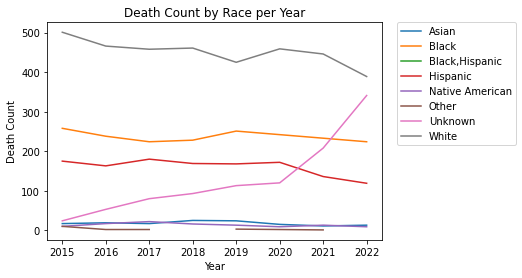

In [ ]:
#####Plotting double line graph

# Create a pivot table to aggregate death counts by race and year
race_table = race_df.pivot_table(index="year", columns="race", values="death_count")

#Plot the multi-line graph
race_table.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Death Count")
plt.title("Death Count by Race per Year")

#Move the legend to the right
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
#Move the legend to the bottom
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(race_table.columns))

#Save the chart as PNG
plt.savefig('Death Count by Race per Year.png')

plt.show()

#STATS BY STATE BY YEAR


##Getting the mean of age of victim at time of death per state per year

In [ ]:
#Getting the mean age per state per year
# save dataset as new variable
data2 = clean_data
# group the data by state and year, and calculate the mean age for each group
mean_age = data2.groupby(['state', 'year'])['age'].mean()
print(mean_age)

state  year
AK     2015    33.500000
       2016    35.285714
       2017    35.000000
       2018    30.428571
       2019    30.928571
                 ...    
WY     2018    33.500000
       2019    58.000000
       2020    31.000000
       2021    34.666667
       2022    32.400000
Name: age, Length: 401, dtype: float64


In [ ]:
print (type(mean_age))

<class 'pandas.core.series.Series'>


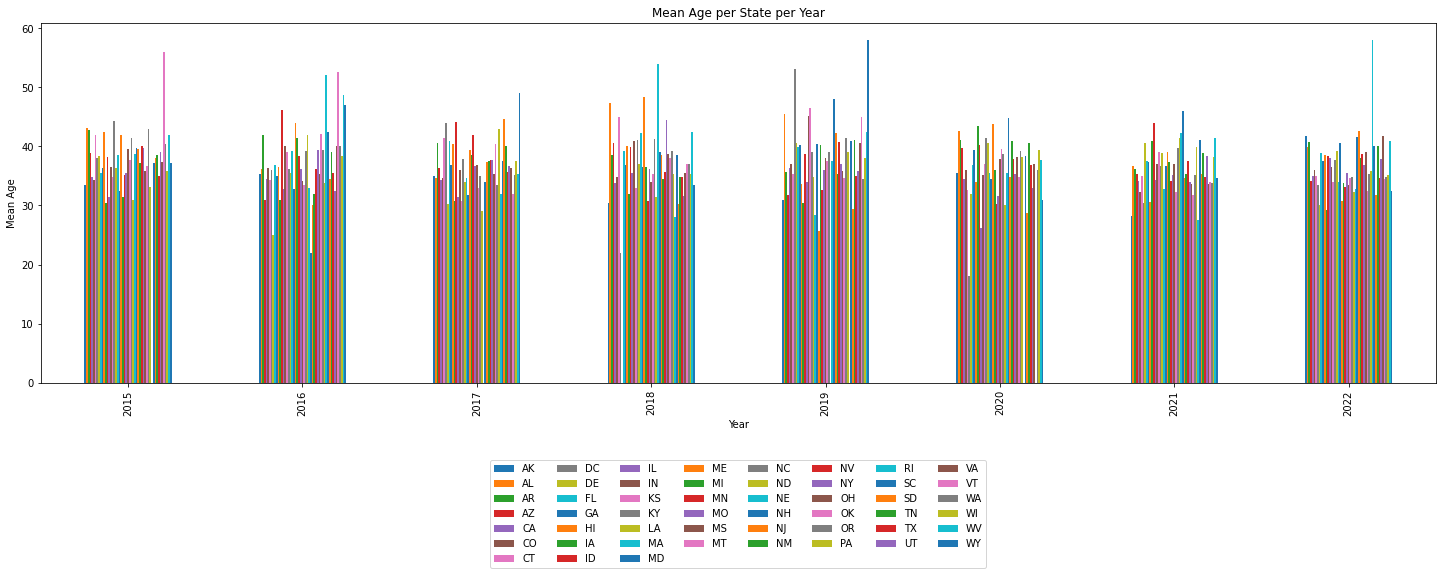

In [ ]:
#creating a grouped bar plot
ax = mean_age.unstack(level=0).plot(kind='bar', figsize=(25, 10))

#set plot title and axis labels
plt.title('Mean Age per State per Year')
plt.xlabel('Year')
plt.ylabel('Mean Age')

#move legend below the title
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(mean_age.unstack().columns))

#adjust layout to make room for the title and legend
plt.subplots_adjust(top=0.8, bottom=0.3)

#Save chart as a PNG file
plt.savefig('2015-2022_mean_age_per_state_per_year.png')

plt.show()

In [ ]:
###Putting mean age into a table

#reshape the mean_deaths Series into a DataFrame with states as rows and years as columns
age_table = mean_age.unstack(level=1)

#format the table using pandas.DataFrame.style()
table_style = age_table.style.format('{:.1f}').set_caption('Mean Age at Time of Death per State per Year')

# display the table
display(table_style)

year,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,
AK,33.5,35.3,35.0,30.4,30.9,35.4,28.1,41.8
AL,43.2,36.2,34.7,47.3,45.5,42.6,36.6,39.9
AR,42.8,42.0,40.6,38.5,35.7,41.1,36.2,40.7
AZ,38.8,30.9,36.4,40.6,31.8,39.7,35.4,34.2
CA,34.8,34.4,34.3,33.7,36.3,34.5,34.1,35.0
CO,34.3,36.3,34.6,34.9,37.0,36.0,32.2,36.0
CT,42.0,34.3,41.4,45.0,35.2,32.6,35.0,35.0
DC,38.0,36.0,44.0,22.0,53.0,18.0,30.4,33.5
DE,38.3,25.0,30.2,nan,40.5,32.0,40.5,30.0


In [ ]:
####Install package (if not already installed) to stylize table above
# !pip install dataframe_image
import dataframe_image as dfi

In [ ]:
###Saving "Mean Age at Time of Death per State per Year" table above into a png
###Restyling the table to have color
table_styled = table_style.background_gradient()
table_styled

year,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,
AK,33.5,35.3,35.0,30.4,30.9,35.4,28.1,41.8
AL,43.2,36.2,34.7,47.3,45.5,42.6,36.6,39.9
AR,42.8,42.0,40.6,38.5,35.7,41.1,36.2,40.7
AZ,38.8,30.9,36.4,40.6,31.8,39.7,35.4,34.2
CA,34.8,34.4,34.3,33.7,36.3,34.5,34.1,35.0
CO,34.3,36.3,34.6,34.9,37.0,36.0,32.2,36.0
CT,42.0,34.3,41.4,45.0,35.2,32.6,35.0,35.0
DC,38.0,36.0,44.0,22.0,53.0,18.0,30.4,33.5
DE,38.3,25.0,30.2,nan,40.5,32.0,40.5,30.0


In [ ]:
#Saving stylized table above - if you don't do it like this it messes up because you need chrome extension
####PROBLEM: It doesn't save it with the gradient :(
dfi.export(
    table_styled,
    "Mean Age per State Table.png",
    table_conversion="matplotlib"
)

In [ ]:
#Finding the youngest and oldest

In [ ]:
clean_data.head()

,date,year,month_year,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,2015,01-2015,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,2015,01-2015,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,2015,01-2015,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,2015,01-2015,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,2015,01-2015,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


#Getting the death count per state per year




In [ ]:
#Counting how much many deaths there were per year
depts_involved_count = clean_data['police_departments_involved'].value_counts()
#print (depts_involved_count)
print ("There are", len(depts_involved_count), "different police departments involved")

There are 3205 different police departments involved


In [ ]:
#Getting the death count per state per year
#Group data by year and state and count the number of victims
new_count_df = clean_data.groupby(["year", "state"]).size().reset_index(name="death_count")

# Print the resulting DataFrame
print(new_count_df)

     year state  death_count
0    2015    AK            4
1    2015    AL           17
2    2015    AR            5
3    2015    AZ           42
4    2015    CA          190
..    ...   ...          ...
396  2022    VT            2
397  2022    WA           39
398  2022    WI           12
399  2022    WV           12
400  2022    WY           10

[401 rows x 3 columns]


In [ ]:
import seaborn as sns

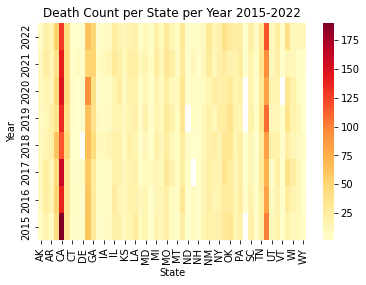

In [ ]:
# Pivot the data to create a matrix with years as rows, states as columns, and death count as values
state_count_df = new_count_df.pivot(index="year", columns="state", values="death_count")

#Make heat map with Seaborn
sns.heatmap(state_count_df, cmap="YlOrRd")

#Set plot title and axis labels
plt.title("Death Count per State per Year 2015-2022")
plt.xlabel("State")
plt.ylabel("Year")

#Reversing the y-axis so that the years increase
plt.gca().invert_yaxis()

#save png
plt.savefig('Death Count by State per Year - Heatmap.png')

#Plot
plt.show()

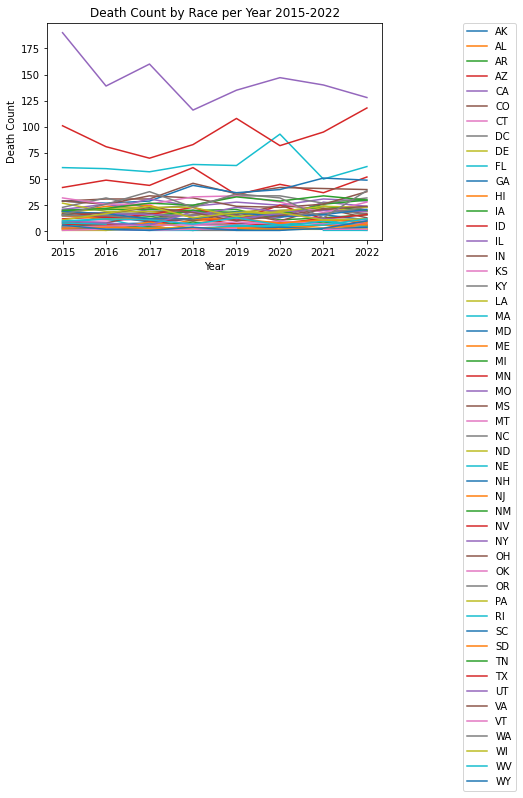

In [ ]:
#####Plotting Multiline graph - not really that usefull
# Create a pivot table to aggregate death counts by race and year
state_count_df = new_count_df.pivot(index="year", columns="state", values="death_count")

#Plot the multi-line graph
state_count_df.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Death Count")
plt.title("Death Count by Race per Year 2015-2022")

#Move the legend to the right
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
#Move the legend to the bottom
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(race_table.columns))


#Save the chart as PNG
plt.savefig('Death Count by State per Year - Multiline Graph.png')

plt.show()

#Getting count of signs of mental illness per state per year

In [ ]:
#Counting how many deaths shows signs of MI per state per year
#Group data by year and state and count the number of victims

# Group data by year and state, and count the number of True values for signs_of_mental_illness
grouped_by_mi = clean_data[clean_data['signs_of_mental_illness'] == True].groupby(['year', 'state'])['signs_of_mental_illness'].sum()

# Reset index to create a DataFrame from the grouped data
yes_mi_df = grouped_by_mi.reset_index()

# Rename the 'signs_of_mental_illness' column to 'count'
yes_mi_df = yes_mi_df.rename(columns={"signs_of_mental_illness": "count"})

# Print the resulting DataFrame
print(yes_mi_df)

     year state  count
0    2015    AL      8
1    2015    AR      1
2    2015    AZ     12
3    2015    CA     52
4    2015    CO      5
..    ...   ...    ...
333  2022    VA      3
334  2022    VT      1
335  2022    WA      3
336  2022    WI      1
337  2022    WV      2

[338 rows x 3 columns]


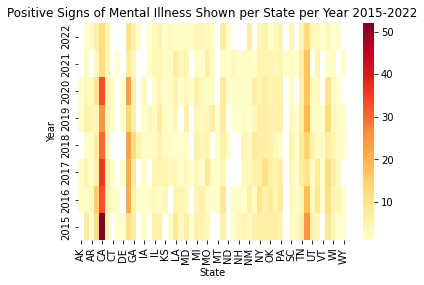

In [ ]:
# Pivot the data to create a matrix with years as rows, states as columns, and death count as values
mi_count_df = yes_mi_df.pivot(index="year", columns="state", values="count")

#Make heat map with Seaborn
sns.heatmap(mi_count_df, cmap="YlOrRd")

#Set plot title and axis labels
plt.title("Positive Signs of Mental Illness Shown per State per Year 2015-2022")
plt.xlabel("State")
plt.ylabel("Year")

#Reversing the y-axis so that the years increase
plt.gca().invert_yaxis()

#save png
plt.savefig('Positive Mental Illness Count by State per Year - Heatmap.png')

#Plot
plt.show()